# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [3]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'incident_ct_total', 'population']]

In [4]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [5]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,incident_ct_total,population,incidents_per_capita
0,2012,5,Albania,NaN,NaN,0,2900401,0.000000e+00
1,2012,6,Algeria,Algeria,NaN,27,37383887,7.222363e-07
2,2012,7,Andorra,NaN,NaN,0,82427,0.000000e+00
3,2012,8,Angola,NaN,NaN,0,25107931,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,NaN,0,90409,0.000000e+00


# Data exploration

Before I create the plot we mocked up, I want to get an idea for the distribution of incidents, populations, and incidents per capita for all countries and all years.

In [6]:
# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

In [7]:
# describe columns of interest
df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


All variables have 1078 values.

The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed.

In [8]:
def plot_histogram(column_name):
    plt.hist(df[column_name], bins=30, label=column_name)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.show()

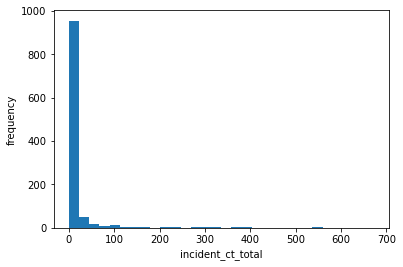

In [9]:
plot_histogram('incident_ct_total')

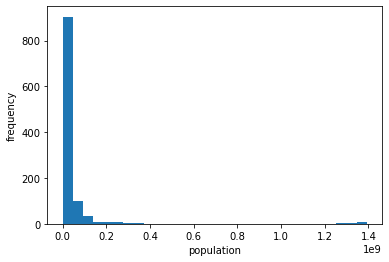

In [10]:
plot_histogram('population')

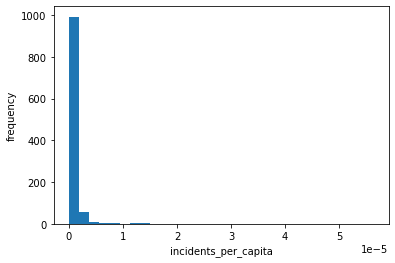

In [11]:
plot_histogram('incidents_per_capita')

I see the right skew I expected in each of these variables. So many zero values!

# Orginal mockup: violin plot with matplotlib

I created this plot to match our mockup, but I don't like how it looks. The violin plot shows the smoothed out distribution - which is pretty boring, since most points are 0!

In [12]:
# find slices for all countries, and countries with high and low tourism
all_x = df['incidents_per_capita']
high_x = df[df['tourism_group']=='high']['incidents_per_capita']
low_x = df[df['tourism_group']=='low']['incidents_per_capita']

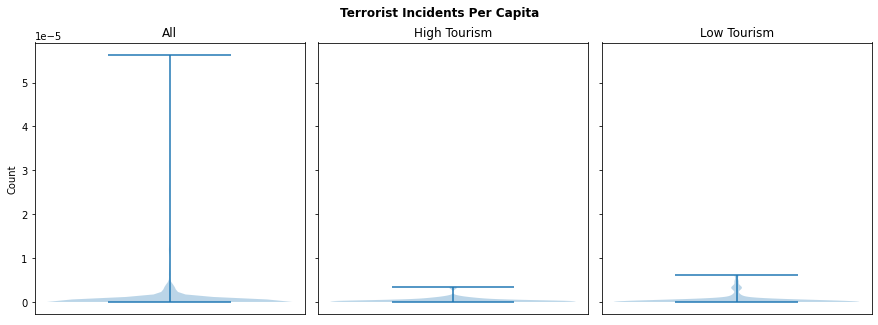

In [13]:
# create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=.05, hspace=0)
fig.suptitle('Terrorist Incidents Per Capita', fontsize=12, fontweight ="bold")

# create violin plots
ax1.violinplot(all_x)
ax2.violinplot(high_x)
ax3.violinplot(low_x)

# add subplot titles
ax1.set_title('All')
ax2.set_title('High Tourism')
ax3.set_title('Low Tourism')

# remove x-axis
for ax in [ax1, ax2, ax3]: ax.xaxis.set_visible(False)

# add y-axis label
ax1.set_ylabel('Count')

# show plot
plt.show()

# New idea: strip plot with seaborn

I think it would be better to see the data points directly, so I am going to switch from a continuous encoding to a discrete encoding - from a density plot to a strip plot. Matplotlib doesn't have a function for a strip plot, but seaborn does, so I'm switching my plotting library as well.

### Strip plot by tourism group

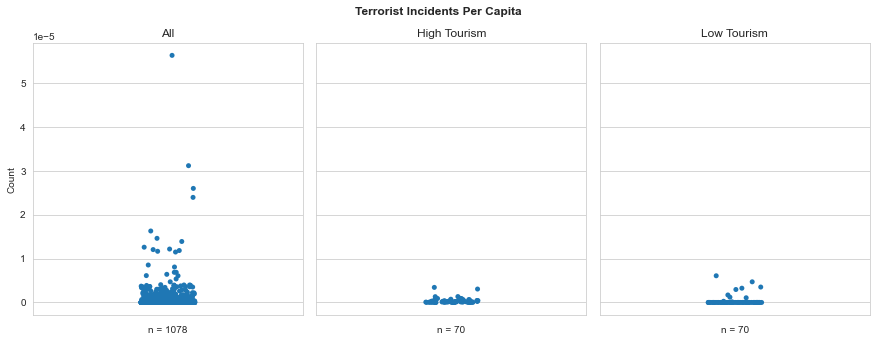

In [14]:
# set style
sns.set_style('whitegrid')

# create figure
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.suptitle('Terrorist Incidents Per Capita\n', fontsize=12, fontweight ="bold")

# create strip plots
sns.stripplot(y=all_x, ax=axs[0])
sns.stripplot(y=high_x, ax=axs[1])
sns.stripplot(y=low_x, ax=axs[2])

# set subplot titles and axis labels
axs[0].set(ylabel='Count', xlabel='n = 1078', title='All')
axs[1].set(ylabel=None, xlabel='n = 70', title='High Tourism')
axs[2].set(ylabel=None, xlabel='n = 70', title='Low Tourism')

# place subplots closer together
fig.subplots_adjust(wspace=.05, hspace=0)

### Strip plot by tourism group and year

In [15]:
# find slices for all countries, and countries with high and low tourism
all_df = df
high_df = df[df['tourism_group']=='high']
low_df = df[df['tourism_group']=='low']

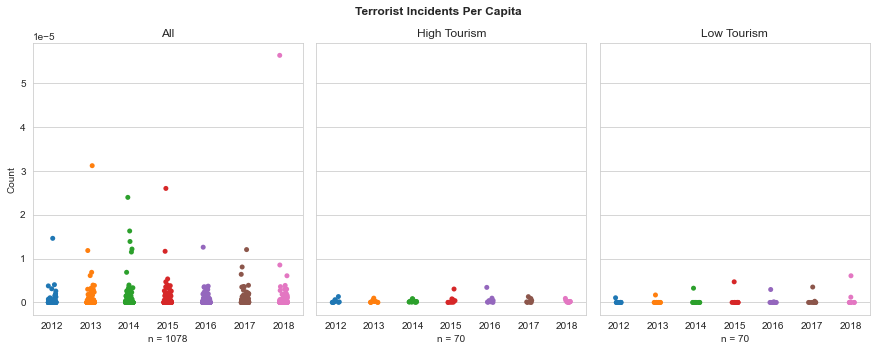

In [16]:
# set style
sns.set_style('whitegrid')

# create figure
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.suptitle('Terrorist Incidents Per Capita\n', fontsize=12, fontweight ="bold")

# create strip plots
sns.stripplot(x='year', y='incidents_per_capita', data=all_df, ax=axs[0])
sns.stripplot(x='year', y='incidents_per_capita', data=high_df, ax=axs[1])
sns.stripplot(x='year', y='incidents_per_capita', data=low_df, ax=axs[2])

# set subplot titles and axis labels
axs[0].set(ylabel='Count', xlabel='n = 1078', title='All')
axs[1].set(ylabel=None, xlabel='n = 70', title='High Tourism')
axs[2].set(ylabel=None, xlabel='n = 70', title='Low Tourism')

# place subplots closer together
fig.subplots_adjust(wspace=.05, hspace=0)

**Key takeaway:** Low tourism countries have slightly more incidents per capita than high tourism countries.